# Final Project - Mental Risk prediction

### Cleaning and Inspecting Original Data

In [1]:
import pandas as pd

In [2]:
file_path = "/content/Mental Health Dataset.csv"
df = pd.read_csv(file_path)

df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
print("\nShape: ", df.shape)
print("\nColumns: ", df.columns.tolist())
print("\nData Types:\n", df.dtypes)



Shape:  (248510, 17)

Columns:  ['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

Data Types:
 Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object


In [4]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())



Missing values per column:
Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              4492
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       1
care_options                  1
dtype: int64

Duplicates: 1958


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# All columns except Timestamp to category
cat_cols = [col for col in df.columns if col != 'Timestamp']
df[cat_cols] = df[cat_cols].astype('category')

print("\nData Types after conversion:\n", df.dtypes)


Data Types after conversion:
 Timestamp                  datetime64[ns]
Gender                           category
Country                          category
Occupation                       category
self_employed                    category
family_history                   category
treatment                        category
Days_Indoors                     category
Growing_Stress                   category
Changes_Habits                   category
Mental_Health_History            category
Mood_Swings                      category
Coping_Struggles                 category
Work_Interest                    category
Social_Weakness                  category
mental_health_interview          category
care_options                     category
dtype: object


In [6]:
#  Clean Categorial Values

import numpy as np

# Standardize yes/no-like responses across all columns
def standardize_binary(val):
    if isinstance(val, str):
        val_lower = val.strip().lower()
        if val_lower in ['yes', 'y']:
            return 'Yes'
        elif val_lower in ['no', 'n']:
            return 'No'
        elif val_lower in ['maybe', 'not sure', 'not_sure', 'unsure']:
            return 'Maybe'
    return val

# Apply standardization to object/category columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].apply(standardize_binary)

# Preview cleaned categories
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


Column: Gender
Gender
Male      195996
Female     52514
Name: count, dtype: int64

Column: Country
Country
United States             146490
United Kingdom             43273
Canada                     16022
Australia                   5243
Netherlands                 4894
Ireland                     4694
Germany                     3825
Sweden                      2461
India                       2344
France                      1913
Brazil                      1912
New Zealand                 1710
South Africa                1708
Italy                       1276
Switzerland                 1275
Israel                      1274
Belgium                      753
Poland                       752
Russia                       638
Denmark                      638
Singapore                    638
Greece                       636
Bosnia and Herzegovina       319
Finland                      319
Costa Rica                   319
Nigeria                      319
Croatia                      319
T

In [15]:
#  Clean and Convert Days_Indoors
#  This script handles the Days_Indoors column and covert it into a numeric range suitable for ML models

# Clean and convert 'Days_Indoors' to ordered categories or numeric range

# Preview unique values
print("\nUnique values in 'Days_Indoors' before cleaning:")
print(df['Days_Indoors'].unique())

# Create a mapping to convert ranges to mid-point numeric values
# Fix mapping based on actual values
days_indoors_map = {
    '1-14 days': 7,
    '15-30 days': 22,
    '31-60 days': 45,
    'Go out Every day': 0,
    'More than 2 months': 90
}

# Apply mapping (fill unmapped values with NaN)
df['Days_Indoors_Clean'] = df['Days_Indoors'].map(days_indoors_map)

# Show result
print("\nValue counts after mapping 'Days_Indoors':")
print(df['Days_Indoors_Clean'].value_counts(dropna=False).sort_index())


Unique values in 'Days_Indoors' before cleaning:
['1-14 days', 'Go out Every day', 'More than 2 months', '15-30 days', '31-60 days']
Categories (5, object): ['1-14 days', '15-30 days', '31-60 days', 'Go out Every day',
                         'More than 2 months']

Value counts after mapping 'Days_Indoors':
Days_Indoors_Clean
7     52478
22    46875
45    52095
0     49756
90    47306
Name: count, dtype: int64


In [16]:
# Extract features from Timestamp

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract useful time features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.day_name()

# Preview extracted columns
print("\nTimestamp feature preview:")
print(df[['Timestamp', 'Year', 'Month', 'Weekday']].head())

# Optional: drop Timestamp if not needed further
# df.drop(columns=['Timestamp'], inplace=True)


Timestamp feature preview:
            Timestamp  Year  Month    Weekday
0 2014-08-27 11:29:00  2014      8  Wednesday
1 2014-08-27 11:31:00  2014      8  Wednesday
2 2014-08-27 11:32:00  2014      8  Wednesday
3 2014-08-27 11:37:00  2014      8  Wednesday
4 2014-08-27 11:43:00  2014      8  Wednesday


In [19]:
#  Handle Missing Values Gracefully
#  Code block to replace the harsh dropna() approach with smarter handling:

# Handle missing values more gracefully

# Check missing value counts
print("\nMissing values per column BEFORE handling:")
print(df.isnull().sum())

# Strategy 1: Fill 'Maybe' with separate category where appropriate
# Already handled in earlier standardization step

# Strategy 2: For 'Days_Indoors_Clean', fill NaN with median (or mean)
df['Days_Indoors_Clean'] = pd.to_numeric(df['Days_Indoors_Clean'], errors='coerce')
df['Days_Indoors_Clean'] = df['Days_Indoors_Clean'].fillna(df['Days_Indoors_Clean'].median())

# Strategy 3: Drop rows with missing 'treatment' (target variable)
df = df[df['treatment'].notnull()]

# Strategy 4: For other remaining NaNs, fill with 'Unknown' or most frequent value
for col in df.columns:
    if df[col].dtype.name == 'category' or df[col].dtype == object:
        most_frequent = df[col].mode().iloc[0]
        df[col] = df[col].fillna(most_frequent)

# Strategy 5: Final check on missing values
print("\nMissing values per column AFTER handling:")
print(df.isnull().sum())


Missing values per column BEFORE handling:
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
Days_Indoors_Clean         0
Year                       0
Weekday                    0
Month                      0
dtype: int64

Missing values per column AFTER handling:
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
M

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Remove NaN values
df = df.dropna()

print("\n Shape after cleaning: ", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


 Shape after cleaning:  (284858, 17)

Missing values after cleaning:
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [20]:
df.describe(include='all')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,...,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Days_Indoors_Clean,Year,Weekday,Month
count,248510,248510,248510,248510,248510,248510,248510,248510,248510,248510,...,248510,248510,248510,248510,248510,248510,248510.000000,248510.000000,248510,248510.000000
unique,NaN,2,35,5,2,2,2,5,3,3,...,3,2,3,3,3,3,NaN,NaN,7,NaN
top,NaN,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,...,Medium,No,No,No,No,No,NaN,NaN,Wednesday,NaN
freq,NaN,195996,146490,58356,224118,148325,127270,52478,86881,92303,...,88149,130154,89238,84449,198359,99856,NaN,NaN,123856,NaN
mean,2014-09-09 03:02:47.869140224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32.193517,2014.052706,NaN,7.801626
min,2014-08-27 11:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2014.000000,NaN,2.000000
25%,2014-08-27 14:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,2014.000000,NaN,8.000000
50%,2014-08-28 00:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,2014.000000,NaN,8.000000
75%,2014-08-28 22:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,2014.000000,NaN,8.000000
max,2016-02-01 23:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,2016.000000,NaN,12.000000


In [21]:
# Print the df to verify all cleaning steps
print("\nCleaned DataFrame:")
df.head()


Cleaned DataFrame:


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,...,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Days_Indoors_Clean,Year,Weekday,Month
0,2014-08-27 11:29:00,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,No,Maybe,7,2014,Wednesday,8
1,2014-08-27 11:31:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,No,No,7,2014,Wednesday,8
2,2014-08-27 11:32:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,No,Yes,7,2014,Wednesday,8
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,Maybe,Yes,7,2014,Wednesday,8
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,...,Medium,No,No,Yes,No,Yes,7,2014,Wednesday,8


### Exploratory Data Analysis


=== Gender ===


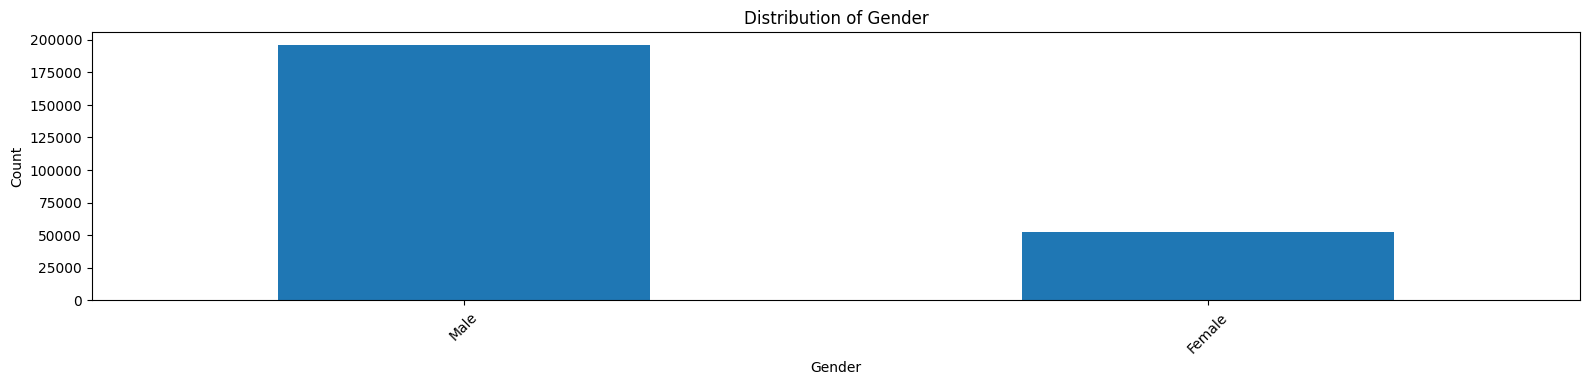


=== Country ===


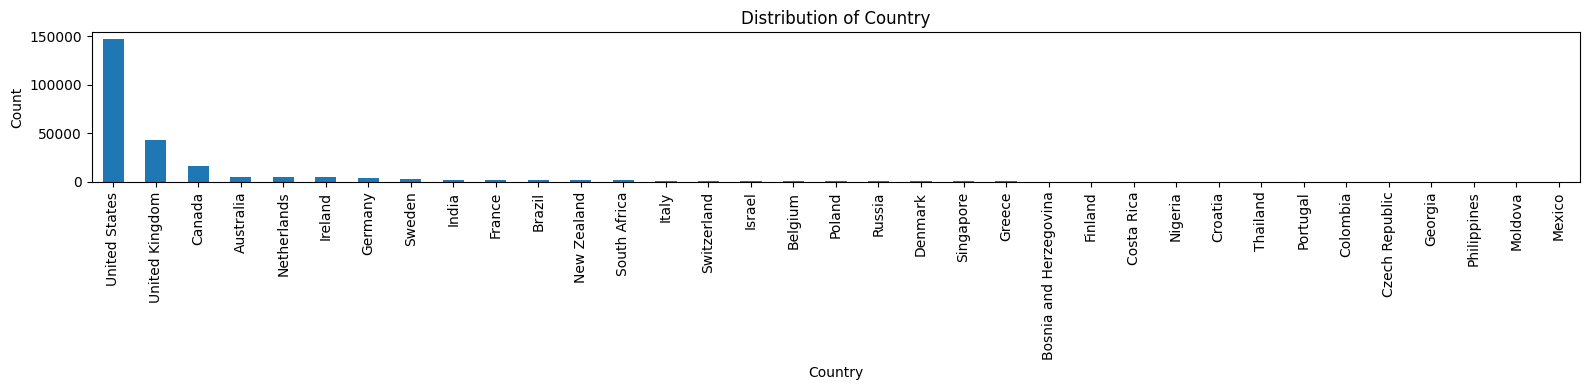


=== Occupation ===


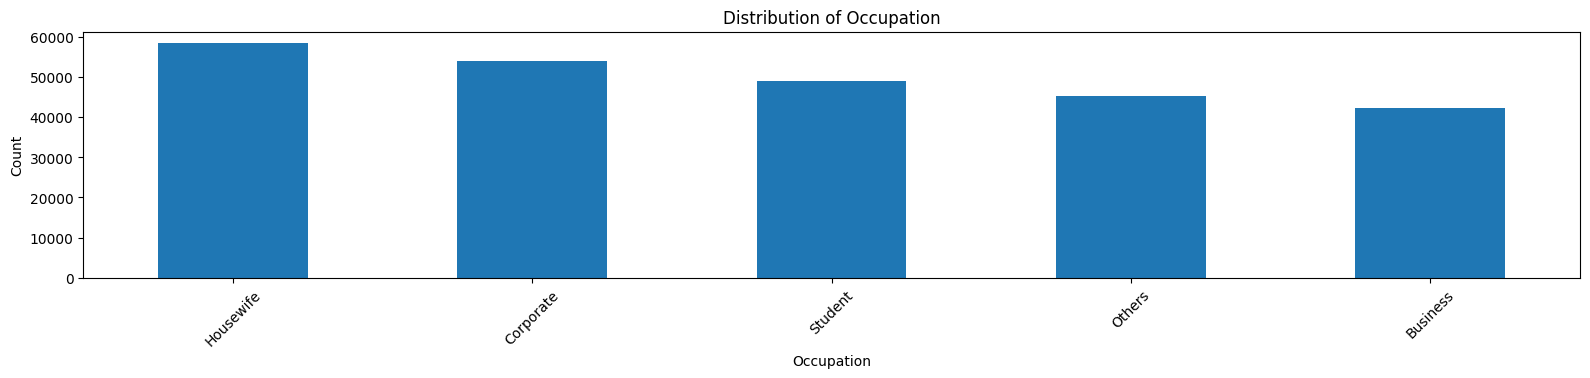


=== self_employed ===


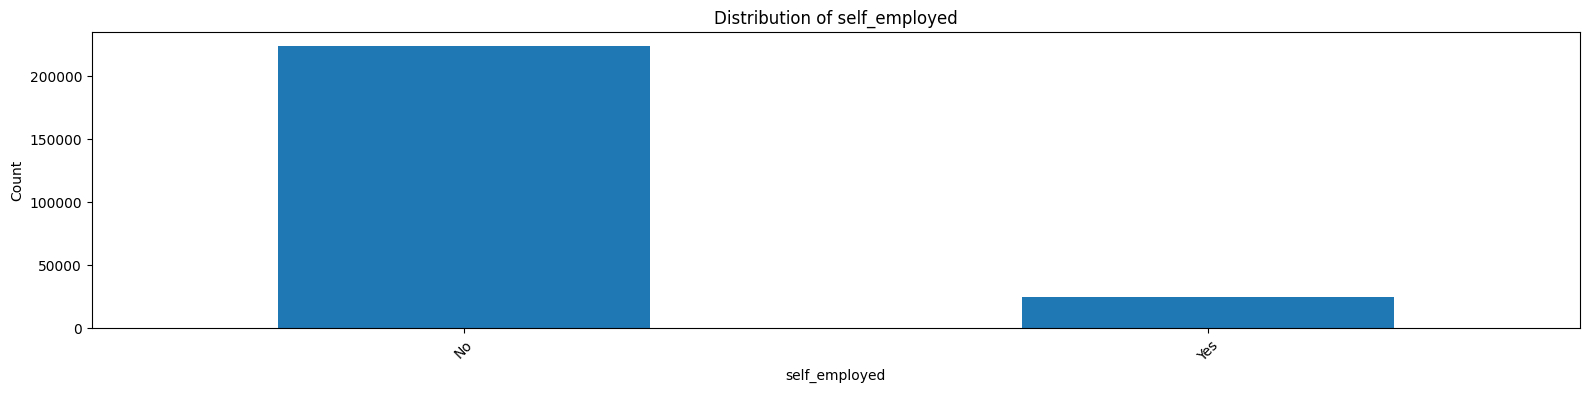


=== family_history ===


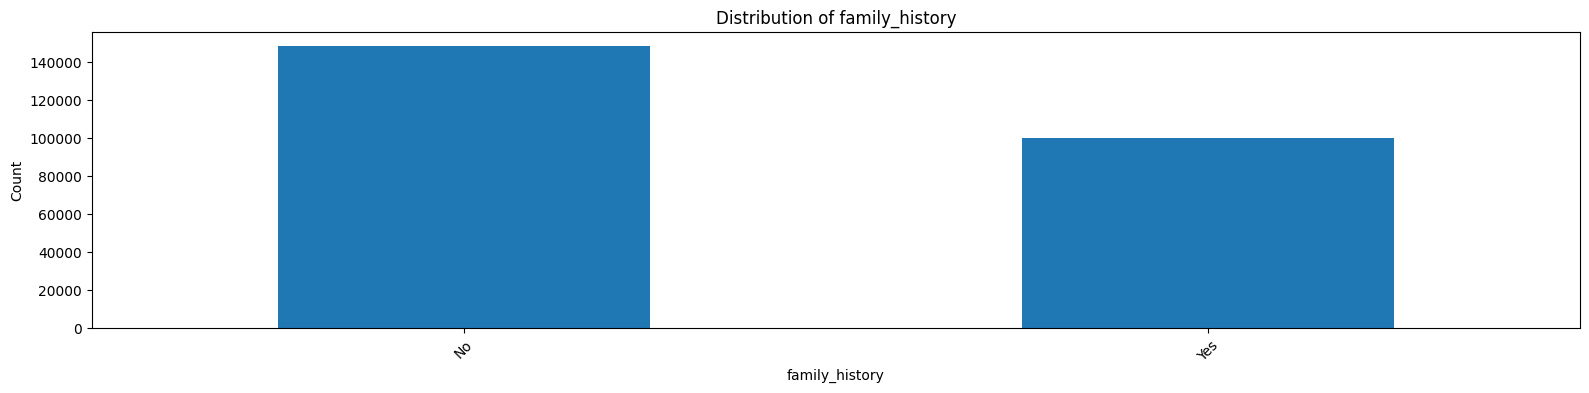


=== treatment ===


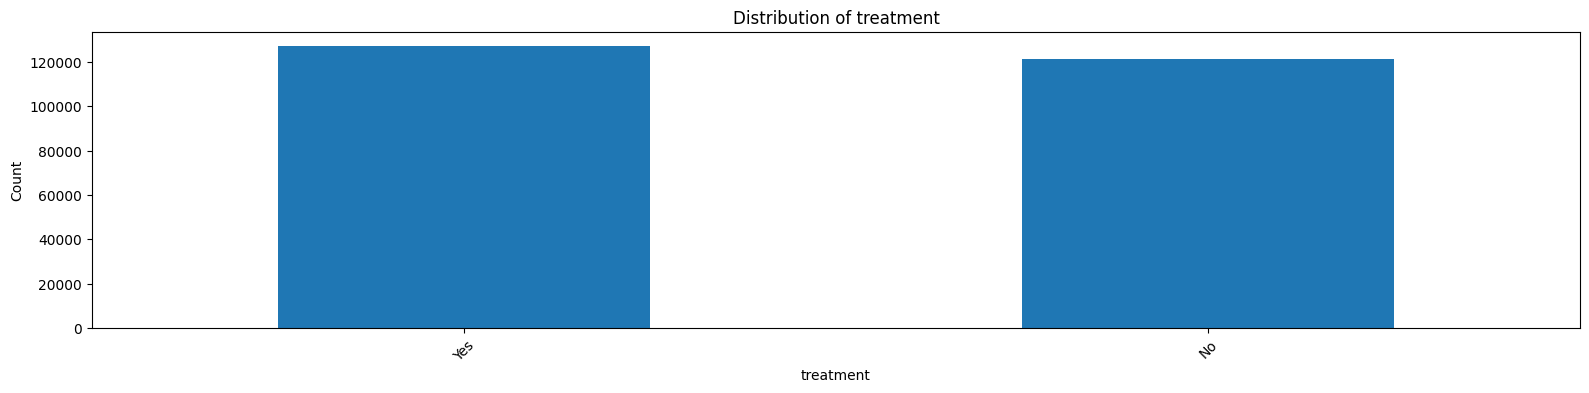


=== Days_Indoors ===


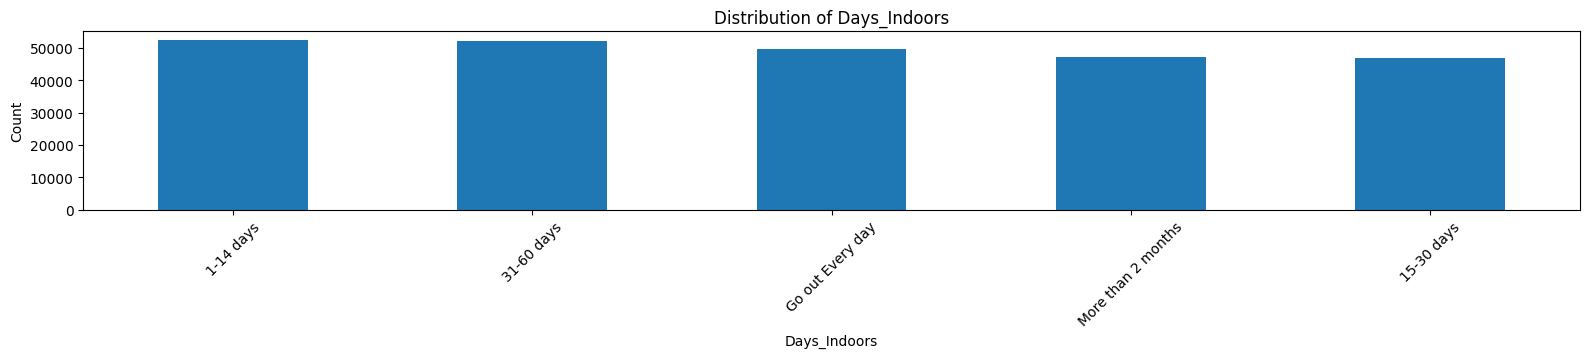


=== Growing_Stress ===


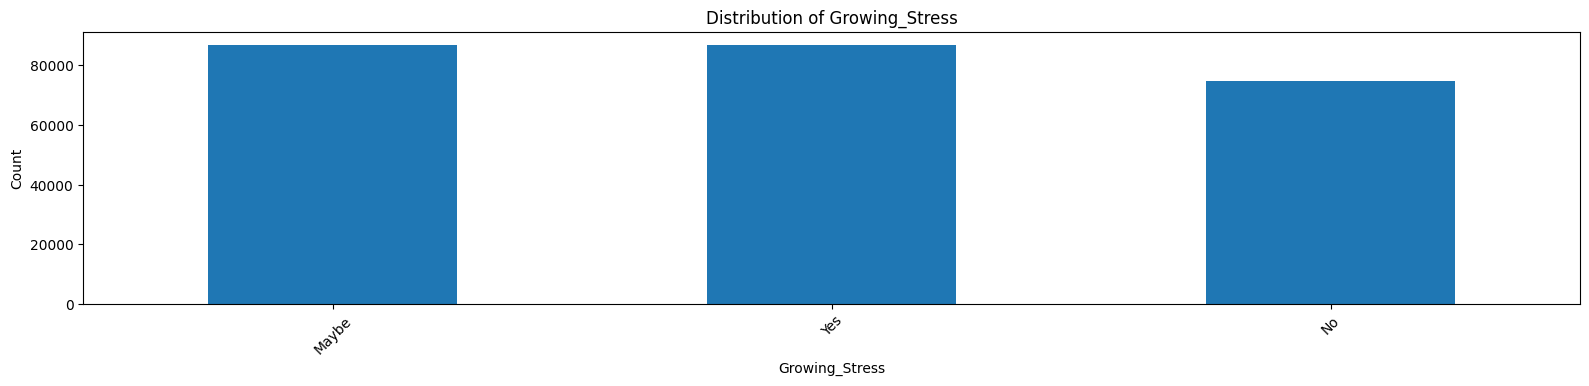


=== Changes_Habits ===


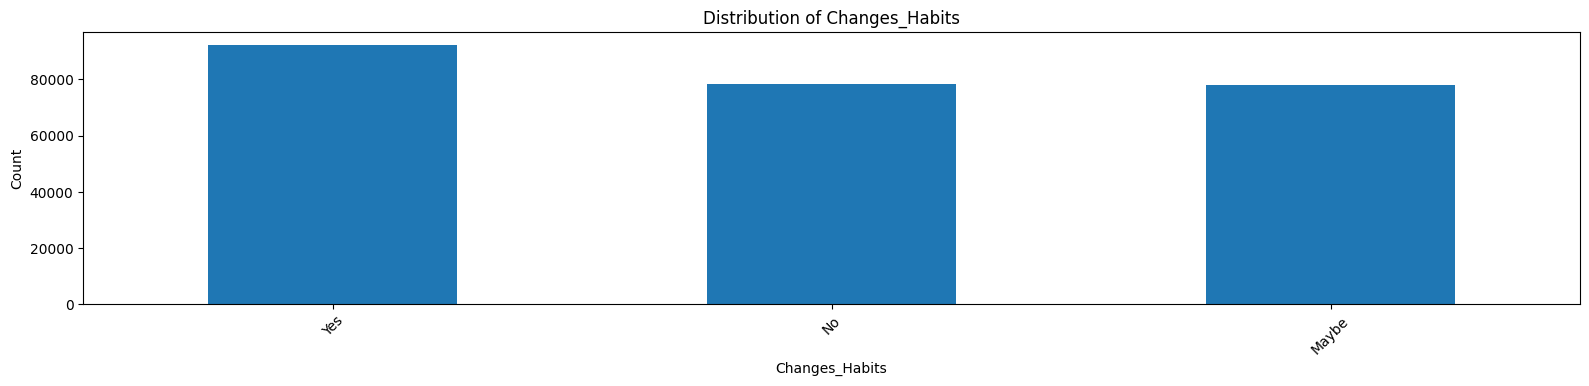


=== Mental_Health_History ===


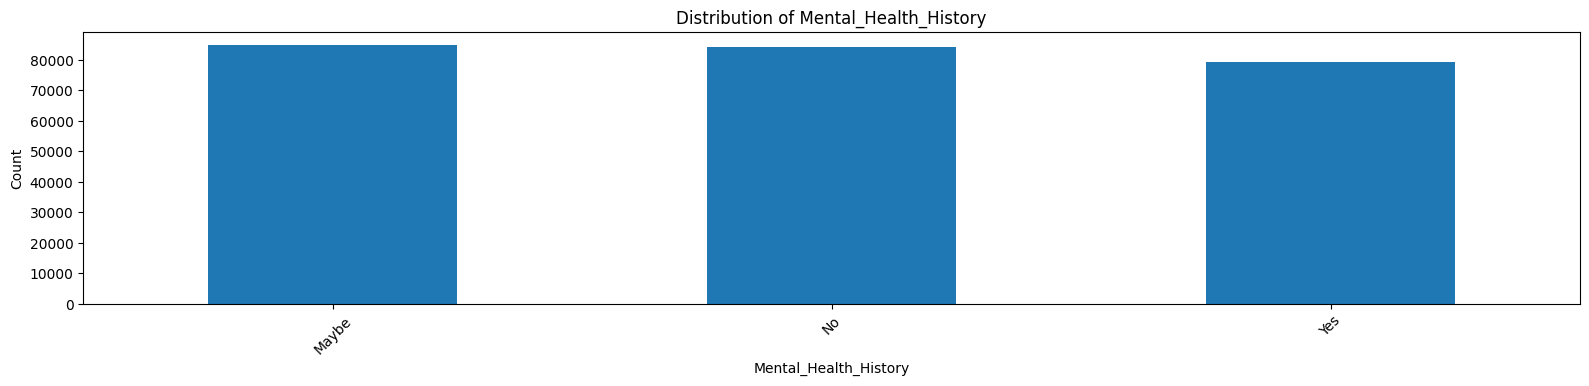


=== Mood_Swings ===


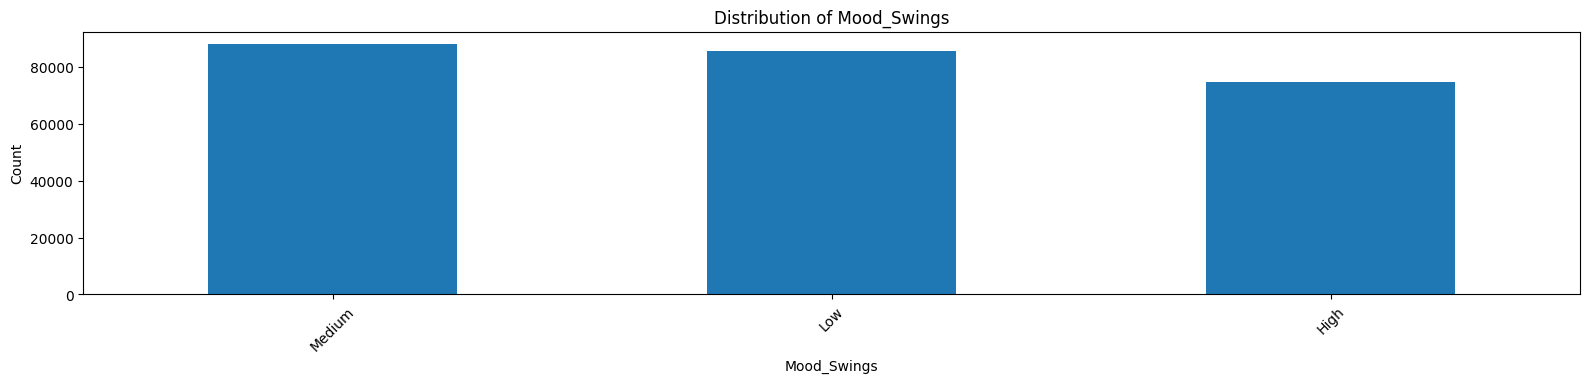


=== Coping_Struggles ===


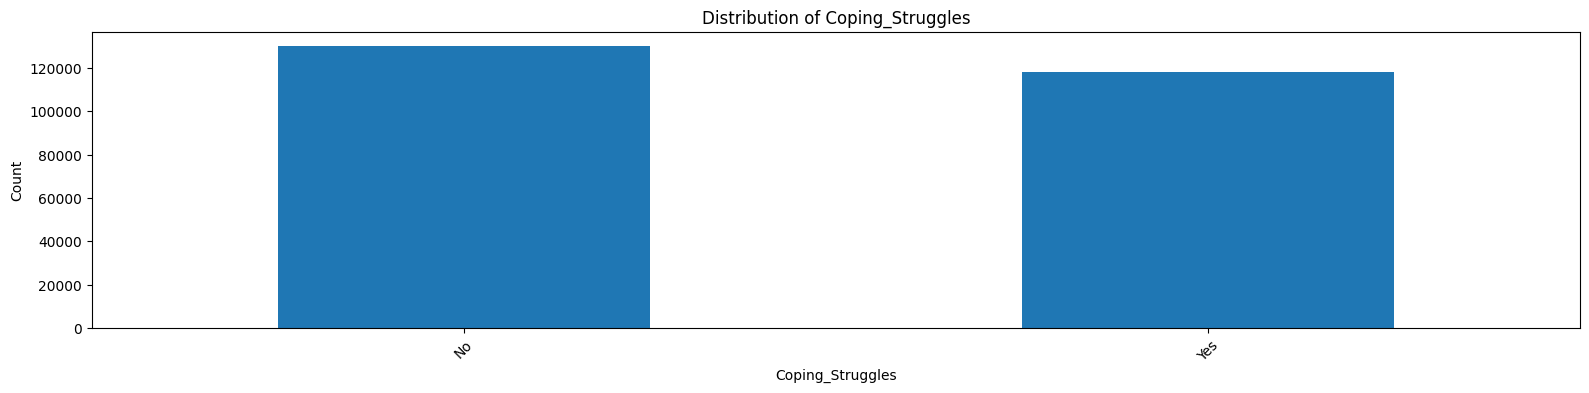


=== Work_Interest ===


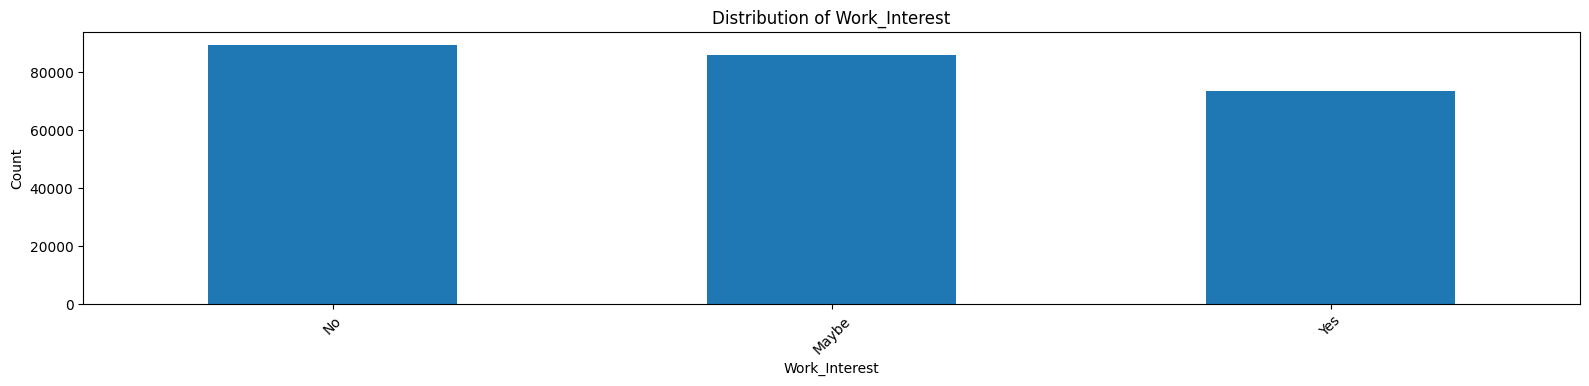


=== Social_Weakness ===


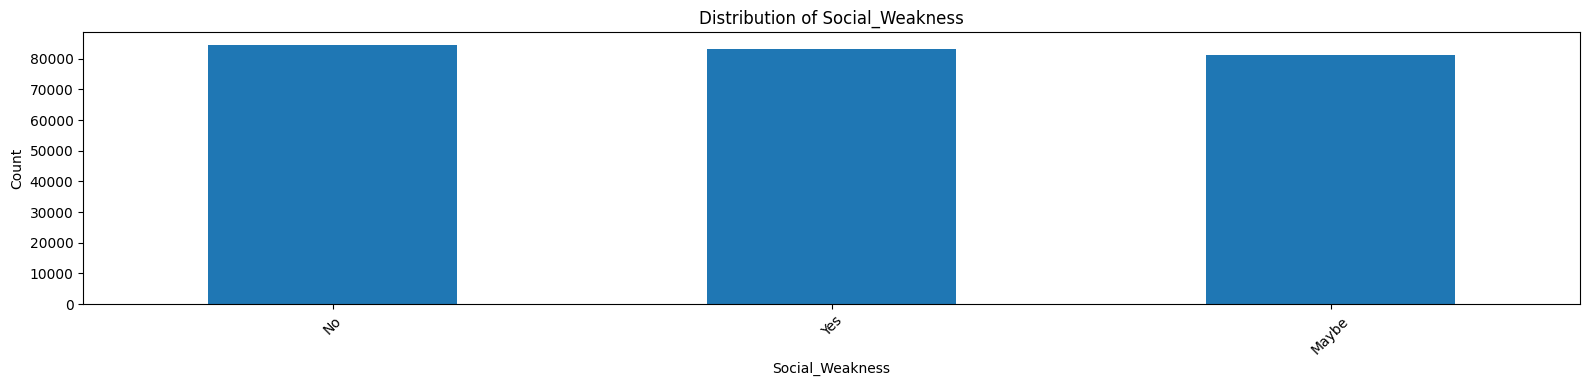


=== mental_health_interview ===


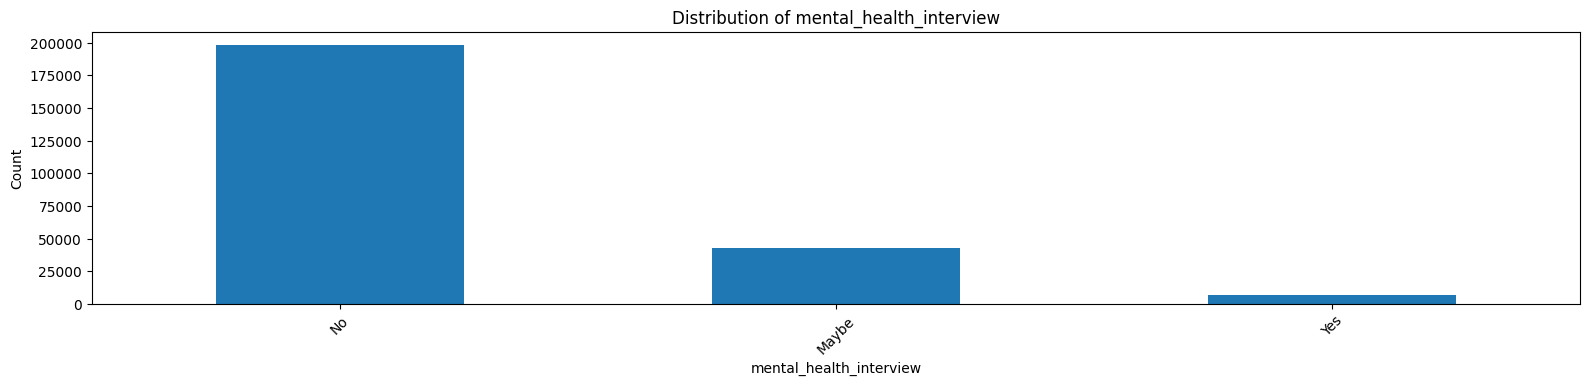


=== care_options ===


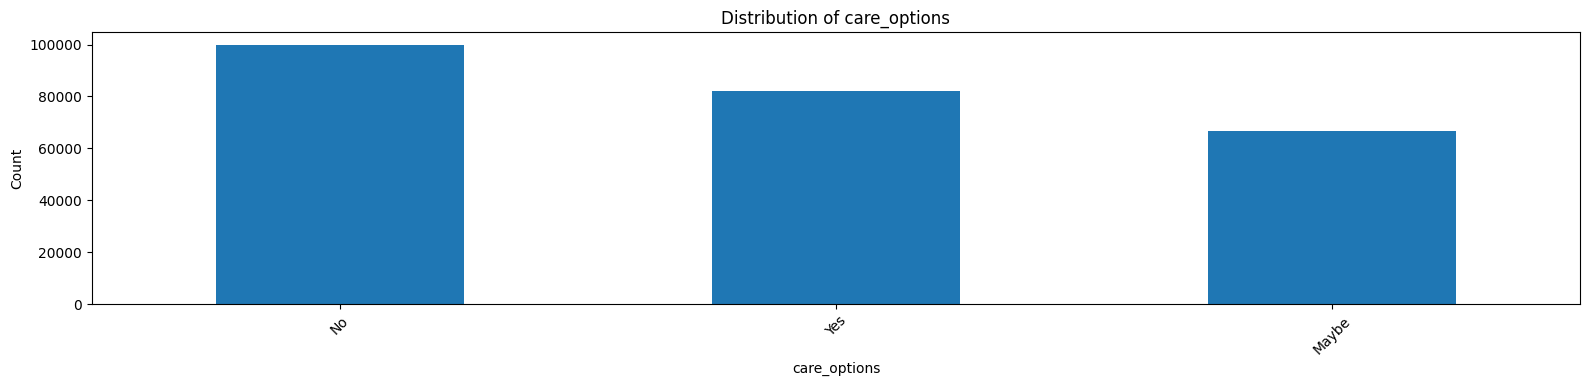

In [22]:
import matplotlib.pyplot as plt

for col in cat_cols:
    print(f"\n=== {col} ===")
    plt.figure(figsize=(16, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    if col.lower() == "country":
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    plt.show()

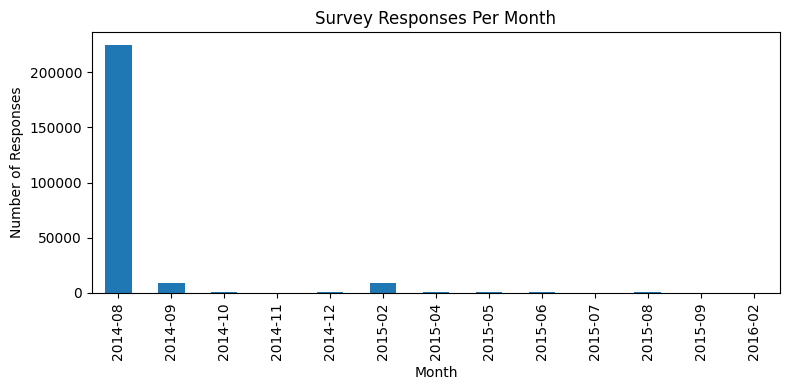

In [23]:
# Extract month (year and month)
df['Month'] = df['Timestamp'].dt.to_period('M')

monthly_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8,4))
monthly_counts.plot(kind='bar')
plt.title('Survey Responses Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

# drop the 'Month' column
df.drop(columns=['Month'], inplace=True)


In [24]:
# Saving the cleaned DataFrame
# Save cleaned dataset to CSV
df.to_csv("cleaned_mental_health_data.csv", index=False)
print("✅ Cleaned data saved to 'cleaned_mental_health_data.csv'")


✅ Cleaned data saved to 'cleaned_mental_health_data.csv'
